# 2-多变量线性回归
## 案例：根据多个因素预测房子价格
### 我们拥有房子面积、卧室个数和价格之间对应的数据：ex1data2.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.读取文件

In [3]:
data = pd.read_csv('ex1data2.txt', names=['sizes','bedrooms','price'])
data.headad()

,sizes,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.特征归一化

In [6]:
def normalize_feature(data):
    """标准化特征归一函数"""
    return (data - data.mean())/data.std()

In [7]:
data = normalize_feature(data)
data.head()

,sizes,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 3.构造数据集
添加全为1的列

In [8]:
data.insert(0,'ones',1)
data.head()

,ones,sizes,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [9]:
X = data.iloc[:,0:-1]
X.head()

,ones,sizes,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [10]:
y = data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

### 将dataframe转成数组

In [11]:
X = X.values
X.shape

(47, 3)

In [12]:
y = y.values
y.shape

(47,)

In [13]:
y = y.reshape(47,1)
y.shape

(47, 1)

### 损失函数

In [16]:
def costFunction(X,y,theta):
    """损失函数定义"""
    inner =np.power(X @ theta - y,2) #np.power求幂
    return np.sum(inner)/(2*len(X)) #np.sum求和

In [18]:
theta = np.zeros((3,1))
cost_init = costFunction(X,y,theta)
print(cost_init)

0.48936170212765967


### 梯度下降函数

In [27]:
def gradientDescent(X,y,theta,alpha,iters,isprint=False):
    """
    梯度下降函数定义
    alpha为学习率，iters为迭代次数
    """
    costs = []#存放每次迭代的损失函数值
    
    for i in range(iters):
        theta = theta - alpha * (X.T @ (X @ theta - y)) / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i%100 == 0: #打印迭代函数值
            if isprint == True:
                print(cost)
    
    return theta,costs

### 不同alpha下的效果对比

In [28]:
candidate_alpha = [0.0003, 0.003, 0.03, 0.0001, 0.001, 0.01]
iters = 2000

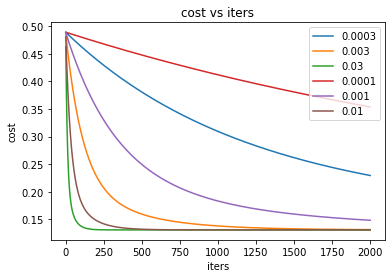

In [32]:
fig,ax = plt.subplots()

for alpha in candidate_alpha:
    _,costs=gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label = alpha)
    ax.legend()
ax.set(xlabel='iters',
      ylabel='cost',
      title='cost vs iters')
plt.show()